# House Price Predictions

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv("HousePrice.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


## First Step Data Correction

In [3]:
df.Area = df.Area.str.strip()
df.Area = df.Area.str.replace(",", "")

df.Price = df.Price.astype("int")
df.Area = df.Area.astype("int")
df.Parking = df.Parking.astype("int")
df.Warehouse = df.Warehouse.astype("int")
df.Elevator = df.Elevator.astype("int")

In [4]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1850000000,61666.67
1,60,1,1,1,1,Shahran,1850000000,61666.67
2,79,2,1,1,1,Pardis,550000000,18333.33
3,95,2,1,1,1,Shahrake Qods,902500000,30083.33
4,123,2,1,1,1,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000,116666.67
3475,83,2,1,1,1,Niavaran,6800000000,226666.67
3476,75,2,0,0,0,Parand,365000000,12166.67
3477,105,2,1,1,1,Dorous,5600000000,186666.67


## Analyze Data

In [5]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3.479000e+03,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,8.744000e+06,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,3.167266e+08,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [6]:
df.Price.describe()

count    3.479000e+03
mean     5.359023e+09
std      8.099935e+09
min      3.600000e+06
25%      1.418250e+09
50%      2.900000e+09
75%      6.000000e+09
max      9.240000e+10
Name: Price, dtype: float64

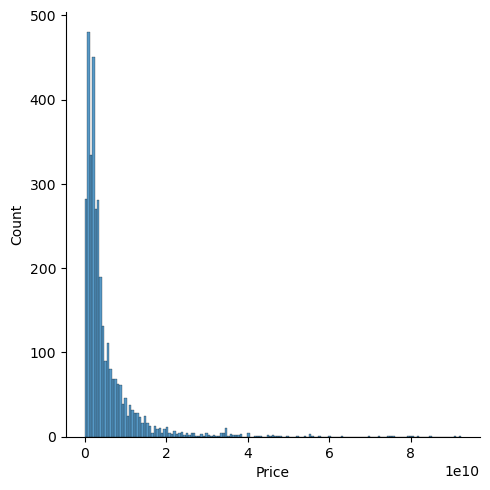

In [7]:
sb.displot(df.Price)
plt.show()

In [8]:
df.Price.skew()

4.779073608152303

In [9]:
df.Area.describe()

count    3.479000e+03
mean     8.744000e+06
std      3.167266e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.200000e+02
max      1.616000e+10
Name: Area, dtype: float64

In [10]:
df.describe(include= ['number']).loc[["min", "max", "mean", "std", "25%", "50%", "75%"]].T.sort_values('max')

,min,max,mean,std,25%,50%,75%
Parking,0.0,1.000000e+00,8.479448e-01,3.591260e-01,1.000000e+00,1.000000e+00,1.000000e+00
Warehouse,0.0,1.000000e+00,9.146306e-01,2.794707e-01,1.000000e+00,1.000000e+00,1.000000e+00
Elevator,0.0,1.000000e+00,7.872952e-01,4.092794e-01,1.000000e+00,1.000000e+00,1.000000e+00
Room,0.0,5.000000e+00,2.079908e+00,7.582753e-01,2.000000e+00,2.000000e+00,2.000000e+00
Price(USD),120.0,3.080000e+06,1.786341e+05,2.699978e+05,4.727500e+04,9.666667e+04,2.000000e+05
Area,30.0,1.616000e+10,8.744000e+06,3.167266e+08,6.900000e+01,9.000000e+01,1.200000e+02
Price,3600000.0,9.240000e+10,5.359023e+09,8.099935e+09,1.418250e+09,2.900000e+09,6.000000e+09


## Data Preprocessing

### Remove Noise and Outlier

In [11]:
df.corr().Price.sort_values(ascending= False)

Price(USD)    1.000000
Price         1.000000
Room          0.567732
Parking       0.190086
Elevator      0.111446
Warehouse     0.109367
Area          0.021144
Name: Price, dtype: float64

In [12]:
total = df.isnull().sum().sort_values(ascending= False)
percent = df.isnull().sum() / df.isnull().count()
pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])

,Total,Percent
Address,23,0.006611
Area,0,0.000000
Room,0,0.000000
Parking,0,0.000000
Warehouse,0,0.000000
Elevator,0,0.000000
Price,0,0.000000
Price(USD),0,0.000000


In [13]:
df.dropna(inplace= True)

### Remove Outliers

In [14]:
df.Area.describe()

count    3.456000e+03
mean     8.802191e+06
std      3.177783e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.210000e+02
max      1.616000e+10
Name: Area, dtype: float64

In [15]:
np.percentile(df.Area, 99)

409.4999999999982

In [16]:
df[df.Area>1000].index
df.drop(df[df.Area>1000].index, inplace= True)

In [17]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [18]:
df.drop("Price(USD)", axis= 1, inplace= True)
#df.drop("Address", axis= 1, inplace= True)

## Encoding Labels

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Address = le.fit_transform(df.Address)

In [20]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,156,1850000000
1,60,1,1,1,1,156,1850000000
2,79,2,1,1,1,117,550000000
3,95,2,1,1,1,152,902500000
4,123,2,1,1,1,150,7000000000
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,163,3500000000
3475,83,2,1,1,1,105,6800000000
3476,75,2,0,0,0,115,365000000
3477,105,2,1,1,1,39,5600000000


In [21]:
X = pd.DataFrame(df.iloc[:, :-1].values)
y = pd.DataFrame(df.iloc[:, -1].values)

In [22]:
X

,0,1,2,3,4,5
0,63,1,1,1,1,156
1,60,1,1,1,1,156
2,79,2,1,1,1,117
3,95,2,1,1,1,152
4,123,2,1,1,1,150
...,...,...,...,...,...,...
3446,86,2,1,1,1,163
3447,83,2,1,1,1,105
3448,75,2,0,0,0,115
3449,105,2,1,1,1,39


In [23]:
y

,0
0,1850000000
1,1850000000
2,550000000
3,902500000
4,7000000000
...,...
3446,3500000000
3447,6800000000
3448,365000000
3449,5600000000


### Encoding Categorical Data

In [24]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
# X = pd.DataFrame(ct.fit_transform(X).toarray())
# print(X)

## Feature Scalling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Train and Test Splliting

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train

array([[-0.03057596, -0.10675819,  0.42406257,  0.30459849,  0.51976043,
         0.43762712],
       [-0.24133019, -1.42255283, -2.3581426 ,  0.30459849, -1.92396333,
         0.17929468],
       [ 0.22232913, -0.10675819,  0.42406257,  0.30459849,  0.51976043,
         0.09980777],
       ...,
       [-0.19917935, -0.10675819,  0.42406257,  0.30459849,  0.51976043,
         1.15300925],
       [-0.62068782, -1.42255283,  0.42406257, -3.28301036,  0.51976043,
         0.29852503],
       [-0.59258726, -1.42255283, -2.3581426 , -3.28301036,  0.51976043,
         0.59660092]])

In [28]:
y_train

,0
1379,5000000000
69,850000000
918,3600000000
29,3200000000
1697,2250000000
...,...
835,7600000000
3264,780000000
1653,4600000000
2607,2153000000


## Create Model

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
regr.coef_

array([[ 4.94103616e+09,  1.29539119e+09, -7.86716861e+07,
         3.23690994e+08,  3.73651882e+08,  8.94999073e+07]])

In [31]:
regr.intercept_

array([5.36179592e+09])

## Predict Model

In [32]:
y_pred = regr.predict(X_test)

In [33]:
y_pred

array([[ 1.08546404e+10],
       [ 5.45468762e+09],
       [ 3.35237453e+09],
       [ 5.03998918e+09],
       [ 8.10262148e+09],
       [ 1.10051171e+08],
       [ 1.03098064e+10],
       [ 6.06561425e+08],
       [ 4.08217442e+09],
       [ 3.77899555e+09],
       [ 4.17496117e+09],
       [ 6.96109914e+09],
       [ 6.63499938e+09],
       [ 9.91129687e+09],
       [ 2.98483614e+10],
       [ 2.05492367e+09],
       [ 5.67890237e+09],
       [ 5.35325135e+09],
       [ 2.31103021e+09],
       [ 3.94878560e+09],
       [ 6.56545489e+09],
       [ 1.15329241e+10],
       [-1.17874340e+09],
       [ 4.19084630e+09],
       [ 6.04552164e+09],
       [ 4.10363817e+09],
       [ 3.90769896e+09],
       [-5.68041845e+08],
       [ 2.63508502e+09],
       [ 5.94339583e+09],
       [ 7.95409628e+09],
       [ 4.71059881e+09],
       [ 3.96123522e+09],
       [ 5.41549946e+09],
       [ 1.68647345e+09],
       [ 1.31454150e+08],
       [ 3.61589897e+09],
       [ 3.26350941e+09],
       [ 4.3

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5500307854065614